# Report02 - Nathan Yee

This notebook contains report02 for computational baysian statistics fall 2016

MIT License: https://opensource.org/licenses/MIT

In [29]:
import numpy as np

import thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Beta
import thinkplot

% matplotlib inline

## Original type 1 - Multi Colored Pens
### My problem, solved with Matthew Beaudouin

Suppose you have a black, violet, red, and green pen. Each pen is identifiable by its colored cap or colored ink, For example, the red pen contains a red cap and red ink. The colored cap is visible, but the ink's color can only be seen on paper. Suppose you randomly mix up the pen's caps such that every cap has an equal probability of being on any colored ink. Later that day, you use the black capped pen and the ink is not black.  What is the probability that the red capped pen has red ink?

To make naming of the long hypotheses easier, I will list a simple naming convention below.  
B: Black  
V: Violet  
R: Red  
G: Green  
c: cap  
i: ink  
n: not  

So BcnBi stands for: "Black cap not Black ink"

### Solution 1 - Two Hypotheses

This problem can be solved with either two or four hypotheses. We will start with two hypotheses:  
hypo 1: The red cap has red ink  
hypo 2: The red cap does not have red ink  

In [15]:
class Pens2(Suite):

    def Likelihood(self, data, hypo):
        """Computes the likelihood of `data` given `hypo`. In this case, we will only
        update a single time with a single piece of data. This function servs as a place
        for calculating likelihoods
        
        data: BcnBi
        hypo: RcRi, RcnRi
        
        returns: float
        """
        if hypo == 'RcRi':
            return 2/3
        if hypo == 'RcnRi':
            return 7/9
        else:
            return 0 # hypotheses are inputted incorectly

When we have two hypotheses, calculating the likelihood is a little bit tricky.  
For our first hypothesis, RcRi, the probability that the black cap does not have black ink is 2/3. This is because two (G, V) out of 3 (G, V, B) pens are avaliable.  
For the second hypothesis, RcnRi, the probability that the black cap does not have black ink is 7/9. To see why, let's break it up into 3 scenarios, the red cap has a violet, green, or black cap. If RcVi, then the black cap coudld have red, black or green ink (2 out of 3 pens). If RcGi, then the black cap could have red, black, or violet ink (2 our of three pens). If RcBi, then the black cap could have red, green or violet ink (3 out of 3 pens). In total, if RcnRi, then the probability that the black cap does not have black ink is (2 + 2 + 3)/(3 + 3 + 3) = 7/9

In [16]:
pens2 = Pens2()
pens2['RcRi'] = 1  # possible ink colors: R
pens2['RcnRi'] = 3 # possible ink colors: V, G, B

In [17]:
pens2.Normalize()
pens2.Print()

RcRi 0.25
RcnRi 0.75


In [18]:
pens2.Update('BcnBi')
pens2.Print()

RcRi 0.2222222222222222
RcnRi 0.7777777777777778


After a single update, the probability that the red capped pen has red ink has fallen from 25% -> 22.2%

### Solution 1 - Four Hypotheses
In the previous two hypotheses solution, making the likelihood function was somewhat difficult. We will redo the problem with four hypotheses to have a simplier likelihood function.

In [19]:
class Pens4(Suite):

    def Likelihood(self, data, hypo):
        """Computes the likelihood of `data` given `hypo`. In this case, we will only
        update a single time with a single piece of data. This function servs as a place
        for calculating likelihoods
        
        data: BcnBi
        hypo: RcRi, RcVi, RcGi, RcBi
        
        returns: float
        """
        if hypo == 'RcRi':
            return 2/3
        if hypo == 'RcVi':
            return 2/3
        if hypo == 'RcGi':
            return 2/3
        if hypo == 'RcBi':
            return 3/3
        else:
            return 0 # hypotheses are inputted incorectly

When we have four hypotheses, calculating the likelihood is much easier.  
'RcRi': black cap could have violet, green, or black  
'RcVi': black cap could have red, green, or black  
'RcGi': black cap could have red, violet or black  
'RcBi': black cap could have red, violet, or green  

In [25]:
hypos = ['RcRi', 'RcVi', 'RcGi', 'RcBi']
pens4 = Pens4(hypos)
pens4.Print()

RcBi 0.25
RcGi 0.25
RcRi 0.25
RcVi 0.25


In [26]:
pens4.Update('BcnBi')
pens4['RcRi']

0.22222222222222224

It turns out, it does not matter how many hypotheses we start with. After seeing that the black cap does not have black ink, the probability of having red cap red ink comes out to be 22.2%

## Unfair coin using various betas as informative priors

David MacKay poses an interesting coin question. I will solve it using various betas as informative priors.  


In Information Theory, Inference, and Learning Algorithms, David MacKay poses this problem:  

A statistical statement appeared in “The Guardian" on Friday January 4, 2002:
When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. ‘It looks very suspicious to me,’ said Barry Blight, a statistics lecturer at the London School of Economics. ‘If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.’  

But do these data give evidence that the coin is biased rather than fair?

### 4 beta functions
We will try 4 beta functions where (alpha, beta) = (1,1), (1,2), (2,1), (2,2)  

Visualize the informed priors below. These 4 informed priors do not resemble each other and should give us a decent idea as to how various betas will behave.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


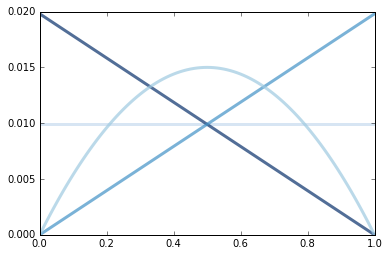

In [87]:
coins = []
for i in range(3):
    for j in range(3):
        coins.append(Beta(i,j))

for coin in coins:
    thinkplot.Pdf(coin.MakePmf())

Start updates with 10 heads and 10 tails. We can see that the informed priors cluster closely to each other with just a moderate amount of data.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


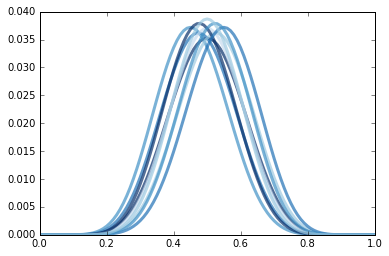

In [88]:
for coin in coins:
    coin.Update((10,10))
for coin in coins:
    thinkplot.Pdf(coin.MakePmf())

Next, we will update with the rest of the data. Now we can see that the informed priors barely make a difference. We have "swamped" the priors with a large amount of data.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


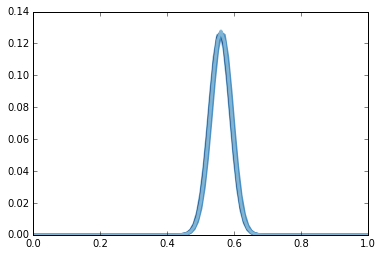

In [89]:
for coin in coins:
    coin.Update((130,100))
for coin in coins:
    thinkplot.Pdf(coin.MakePmf())

### Many extreme betas
Now, let's try with an extreme range of betas to futher illustrate how informed priors react to moderate and large bayesian updates. An extreme beta will be defined as an uninformed prior that is vastly different than what we know to be our expected outcome.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


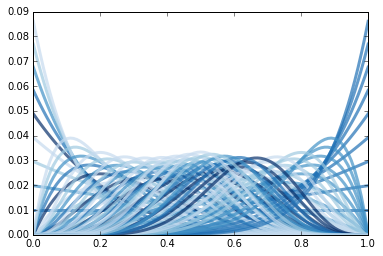

In [93]:
coins2 = []
for i in range(10):
    for j in range(10):
        coins2.append(Beta(i,j))
for coin in coins2:
    thinkplot.Pdf(coin.MakePmf())

Initial update with a moderate amount of data. Notice that with the large extreme range of betas, we can see that an inaccurate informed beta can be detrimental to meaningful results.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


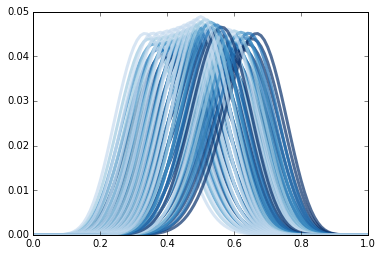

In [94]:
for coin in coins2:
    coin.Update((10,10))
for coin in coins2:
    thinkplot.Pdf(coin.MakePmf())

Now, lets see what happens when we "swamp" the prior with a large amount of data.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


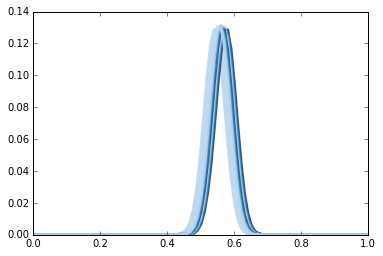

In [95]:
for coin in coins2:
    coin.Update((130,100))
for coin in coins2:
    thinkplot.Pdf(coin.MakePmf())

Low and behold, with a large amount of data, all of our extreme betas have converged to almost the same set of probabilities. It is nice to see that with enough data, we can almost always arrive at a meaningful conclusion.